In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fastFashionCompDim.csv')

In [3]:
df.head()

,item_code,part_name,material,percent,year,water_pollution _index,co2_emission_index
0,100008.0,EXTERIOR,acrilico,58%,2023.0,2.0,2.0
1,100008.0,EXTERIOR,acrilico,58%,2019.0,3.0,5.0
2,100008.0,EXTERIOR,acrilico,58%,2022.0,2.0,1.0
3,100013.0,EXTERIOR,acrilico,59%,2022.0,4.0,1.0
4,300009.0,EXTERIOR,acrilico,21%,2020.0,4.0,6.0


In [4]:
# Shuffle the DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# Write the shuffled DataFrame back to a CSV file
shuffled_df.to_csv('shuffled_data.csv', index=False)

print("Data shuffled and saved to 'shuffled_data.csv'")

Data shuffled and saved to 'shuffled_data.csv'


In [5]:
shuffled_df.head()

,item_code,part_name,material,percent,year,water_pollution _index,co2_emission_index
0,200013.0,EXTERIOR,viscosa,100%,2021.0,3.0,10.0
1,300017.0,EXTERIOR,poliester,30%,2023.0,4.0,2.0
2,200046.0,EXTERIOR,algodon,100%,2019.0,4.0,3.0
3,100029.0,FORRO,viscosa,100%,2023.0,1.0,3.0
4,100044.0,EXTERIOR,viscosa,100%,2023.0,2.0,5.0


In [6]:
shuffled_df.columns

Index(['item_code', 'part_name', 'material', 'percent', 'year',
       'water_pollution _index', 'co2_emission_index'],
      dtype='object')

In [7]:
# Count the number of null values in each column
null_counts = shuffled_df.isnull().sum()
print(null_counts)

item_code                 1
part_name                 1
material                  1
percent                   1
year                      1
water_pollution _index    1
co2_emission_index        1
dtype: int64


In [8]:
# Remove null values
shuffled_df = shuffled_df.dropna()

In [9]:
# Count the number of null values in each column after removing null values
shuffled_df.isnull().sum()

item_code                 0
part_name                 0
material                  0
percent                   0
year                      0
water_pollution _index    0
co2_emission_index        0
dtype: int64

In [10]:
# Accessing data types of each column
print(shuffled_df.dtypes)

item_code                 float64
part_name                  object
material                   object
percent                    object
year                      float64
water_pollution _index    float64
co2_emission_index        float64
dtype: object


In [11]:
 print(shuffled_df['part_name'].value_counts())

EXTERIOR    2550
FORRO        192
Name: part_name, dtype: int64


In [12]:
 print(shuffled_df['material'].value_counts())

poliester           888
elastano            546
viscosa             516
algodon             456
poliamida            90
liocel               72
nailon               60
lino                 30
acrilico             24
fibra metalizada     18
lana                 18
modal                12
camello               6
cupro                 6
Name: material, dtype: int64


In [13]:
 print(shuffled_df['water_pollution _index'].value_counts())

3.0    583
1.0    555
5.0    546
2.0    539
4.0    519
Name: water_pollution _index, dtype: int64


In [14]:
 print(shuffled_df['co2_emission_index'].value_counts())

9.0     307
4.0     303
7.0     281
5.0     275
2.0     273
6.0     263
1.0     263
10.0    262
3.0     262
8.0     253
Name: co2_emission_index, dtype: int64


In [15]:
 print(shuffled_df['co2_emission_index'].value_counts())

9.0     307
4.0     303
7.0     281
5.0     275
2.0     273
6.0     263
1.0     263
10.0    262
3.0     262
8.0     253
Name: co2_emission_index, dtype: int64


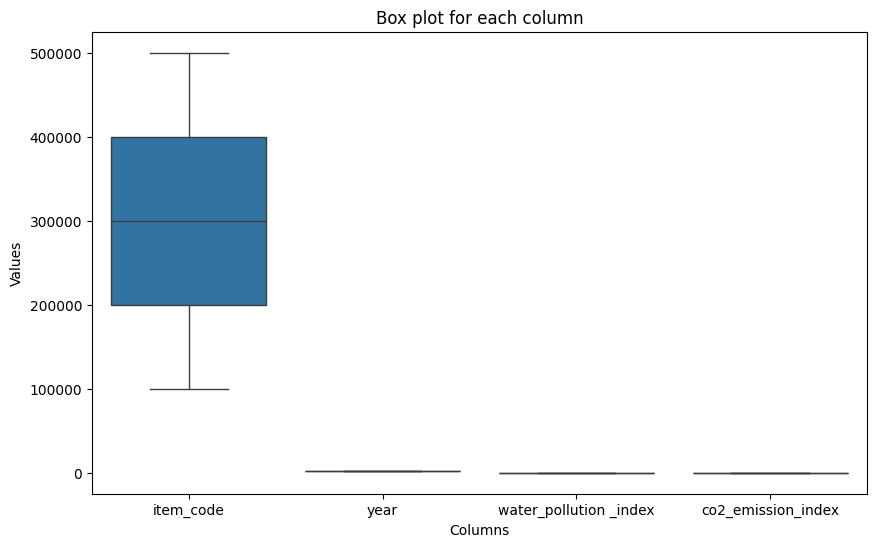

Outliers:
      co2_emission_index  item_code  material  part_name  percent  \
0                  False      False     False      False    False   
1                  False      False     False      False    False   
2                  False      False     False      False    False   
3                  False      False     False      False    False   
4                  False      False     False      False    False   
...                  ...        ...       ...        ...      ...   
2738               False      False     False      False    False   
2739               False      False     False      False    False   
2740               False      False     False      False    False   
2741               False      False     False      False    False   
2742               False      False     False      False    False   

      water_pollution _index   year  
0                      False  False  
1                      False  False  
2                      False  False  
3        

<ipython-input-16-9a2a28ae1d16>:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = shuffled_df.quantile(0.25)
<ipython-input-16-9a2a28ae1d16>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = shuffled_df.quantile(0.75)
<ipython-input-16-9a2a28ae1d16>:24: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (shuffled_df < lower_bound) | (shuffled_df > upper_bound)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=shuffled_df)
plt.title("Box plot for each column")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

# Calculate quartiles for each column
Q1 = shuffled_df.quantile(0.25)
Q3 = shuffled_df.quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = (shuffled_df < lower_bound) | (shuffled_df > upper_bound)

print("Outliers:")
print(outliers)

In [17]:
# Check unique values in the 'percent' column
unique_values = shuffled_df['percent'].unique()
print(unique_values)

['100%' '30%' '4%' '70%' '68%' '18%' '92%' '20%' '53%' '5%' '32%' '28%'
 '55%' '65%' '74%' '97%' '88%' '58%' '95%' '6%' '29%' '46%' '98%' '3%'
 '35%' '76%' '63%' '25%' '33%' '26%' '22%' '31%' '67%' '77%' '1%' '50%'
 '60%' '42%' '34%' '7%' '39%' '8%' '64%' '37%' '2%' '21%' '79%' '23%'
 '96%' '66%' '48%' '36%' '45%' '17%' '10%' '49%' '71%' '59%' '62%' '24%'
 '19%' '52%' '54%' '11%' '47%' '44%' '12%' '78%' '16%' '75%' '51%' '90%'
 '99%' '40%' '15%']


In [18]:
# Convert 'Percentage' column to numeric
shuffled_df['percent'] = pd.to_numeric(shuffled_df['percent'].str.rstrip('%')) / 100

In [19]:
shuffled_df.head()

,item_code,part_name,material,percent,year,water_pollution _index,co2_emission_index
0,200013.0,EXTERIOR,viscosa,1.0,2021.0,3.0,10.0
1,300017.0,EXTERIOR,poliester,0.3,2023.0,4.0,2.0
2,200046.0,EXTERIOR,algodon,1.0,2019.0,4.0,3.0
3,100029.0,FORRO,viscosa,1.0,2023.0,1.0,3.0
4,100044.0,EXTERIOR,viscosa,1.0,2023.0,2.0,5.0


<ipython-input-20-2b1e7794af3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = shuffled_df.corr()


                        item_code   percent      year  water_pollution _index  \
item_code                1.000000 -0.328160  0.017329                0.034438   
percent                 -0.328160  1.000000 -0.017298               -0.018243   
year                     0.017329 -0.017298  1.000000                0.023517   
water_pollution _index   0.034438 -0.018243  0.023517                1.000000   
co2_emission_index       0.057295 -0.038756  0.014347                0.014260   

                        co2_emission_index  
item_code                         0.057295  
percent                          -0.038756  
year                              0.014347  
water_pollution _index            0.014260  
co2_emission_index                1.000000  


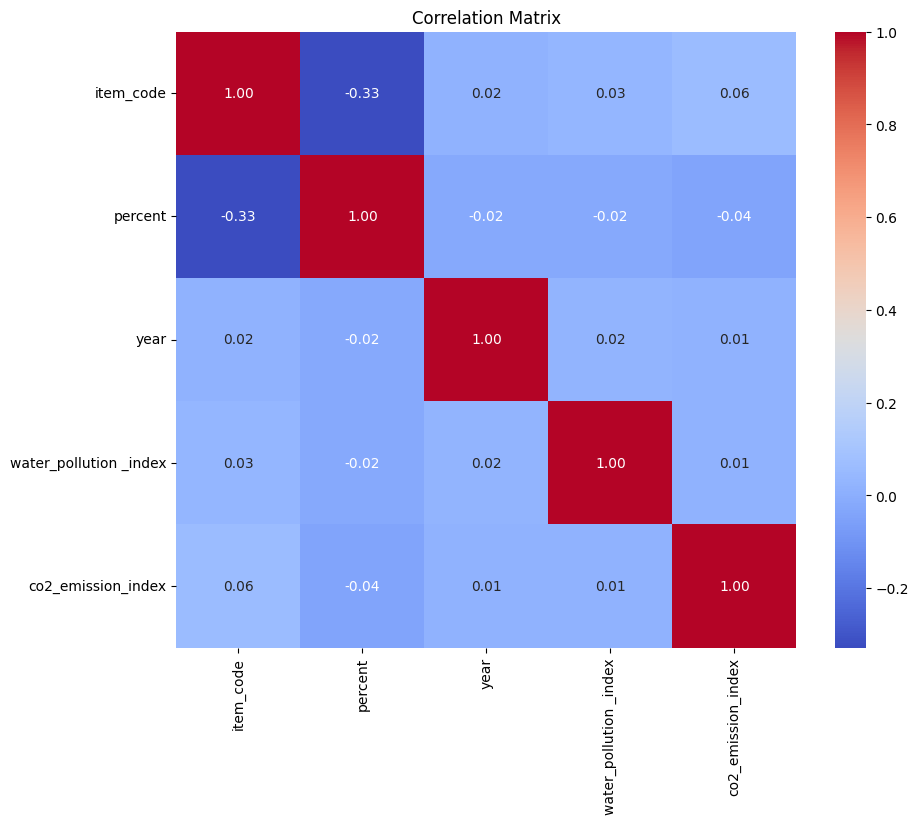

In [20]:
# Calculate correlation matrix
correlation_matrix = shuffled_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Accessing data types of each column
print(shuffled_df.dtypes)

item_code                 float64
part_name                  object
material                   object
percent                   float64
year                      float64
water_pollution _index    float64
co2_emission_index        float64
dtype: object


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder = OneHotEncoder()
# Encode 'part_name' column and convert it into a DataFrame
encoded_part_name = encoder.fit_transform(shuffled_df[['part_name']]).toarray()
encoded_part_name_df = pd.DataFrame(encoded_part_name, columns=encoder.get_feature_names_out(['part_name']))

In [24]:
# Encode 'part_name' column and convert it into a DataFrame
encoded_material = encoder.fit_transform(shuffled_df[['material']]).toarray()
encoded_material_df = pd.DataFrame(encoded_material, columns=encoder.get_feature_names_out(['material']))

In [25]:
# Concatenate the encoded_part_name_df with shuffled_df
shuffled_df = pd.concat([shuffled_df, encoded_part_name_df], axis=1)

In [26]:
shuffled_df.head()

,item_code,part_name,material,percent,year,water_pollution _index,co2_emission_index,part_name_EXTERIOR,part_name_FORRO
0,200013.0,EXTERIOR,viscosa,1.0,2021.0,3.0,10.0,1.0,0.0
1,300017.0,EXTERIOR,poliester,0.3,2023.0,4.0,2.0,1.0,0.0
2,200046.0,EXTERIOR,algodon,1.0,2019.0,4.0,3.0,1.0,0.0
3,100029.0,FORRO,viscosa,1.0,2023.0,1.0,3.0,0.0,1.0
4,100044.0,EXTERIOR,viscosa,1.0,2023.0,2.0,5.0,1.0,0.0


In [27]:
# Concatenate the encoded_part_name_df with shuffled_df
shuffled_df = pd.concat([shuffled_df, encoded_material_df], axis=1)

In [28]:
shuffled_df.head()

,item_code,part_name,material,percent,year,water_pollution _index,co2_emission_index,part_name_EXTERIOR,part_name_FORRO,material_acrilico,...,material_elastano,material_fibra metalizada,material_lana,material_lino,material_liocel,material_modal,material_nailon,material_poliamida,material_poliester,material_viscosa
0,200013.0,EXTERIOR,viscosa,1.0,2021.0,3.0,10.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,300017.0,EXTERIOR,poliester,0.3,2023.0,4.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,200046.0,EXTERIOR,algodon,1.0,2019.0,4.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100029.0,FORRO,viscosa,1.0,2023.0,1.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100044.0,EXTERIOR,viscosa,1.0,2023.0,2.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
shuffled_df = shuffled_df.drop(['material', 'part_name'], axis=1)

In [30]:
# Remove rows with NaN values
shuffled_df = shuffled_df.dropna()

In [31]:
shuffled_df.head()

,item_code,percent,year,water_pollution _index,co2_emission_index,part_name_EXTERIOR,part_name_FORRO,material_acrilico,material_algodon,material_camello,...,material_elastano,material_fibra metalizada,material_lana,material_lino,material_liocel,material_modal,material_nailon,material_poliamida,material_poliester,material_viscosa
0,200013.0,1.0,2021.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,300017.0,0.3,2023.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,200046.0,1.0,2019.0,4.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100029.0,1.0,2023.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100044.0,1.0,2023.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
shuffled_df.shape

(2741, 21)

In [33]:
# Prepare data
shuffled_df['year'] = pd.to_datetime(shuffled_df['year'])
shuffled_df.set_index('year', inplace=True)

In [34]:
shuffled_df.head()

,item_code,percent,water_pollution _index,co2_emission_index,part_name_EXTERIOR,part_name_FORRO,material_acrilico,material_algodon,material_camello,material_cupro,material_elastano,material_fibra metalizada,material_lana,material_lino,material_liocel,material_modal,material_nailon,material_poliamida,material_poliester,material_viscosa
year,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002021,200013.0,1.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1970-01-01 00:00:00.000002023,300017.0,0.3,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1970-01-01 00:00:00.000002019,200046.0,1.0,4.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:00:00.000002023,100029.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1970-01-01 00:00:00.000002023,100044.0,1.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(shuffled_df)

In [36]:
# Define function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [37]:
# # Choose sequence length (number of time steps to look back)
# seq_length = 12  # You can adjust this value based on your data

In [38]:
# # Create sequences for water_pollution_index
# X_water, y_water = create_sequences(df_scaled[:, 1:], seq_length)

In [39]:
# # Create sequences for co2_emission_index
# X_co2, y_co2 = create_sequences(df_scaled[:, [0, 2]], seq_length)

In [40]:
# # Train-test split (assuming last 2 years as test data)
# # Train-test split (assuming last 10 years as test data)
# X_train_water, X_test_water = X_water[:-10], X_water[-10:]
# y_train_water, y_test_water = y_water[:-10], y_water[-10:]

In [41]:
# X_train_co2, X_test_co2 = X_co2[:-2], X_co2[-2:]
# y_train_co2, y_test_co2 = y_co2[:-2], y_co2[-2:]

In [42]:
# # Reshape input data to fit LSTM model
# X_train_water = X_train_water.reshape((X_train_water.shape[0], X_train_water.shape[1], X_train_water.shape[2]))
# X_test_water = X_test_water.reshape((X_test_water.shape[0], X_test_water.shape[1], X_test_water.shape[2]))

In [43]:
# X_train_co2 = X_train_co2.reshape((X_train_co2.shape[0], X_train_co2.shape[1], X_train_co2.shape[2]))
# X_test_co2 = X_test_co2.reshape((X_test_co2.shape[0], X_test_co2.shape[1], X_test_co2.shape[2]))

In [44]:
# # Build LSTM model for water_pollution_index
# model_water = Sequential()
# model_water.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train_water.shape[2])))
# model_water.add(Dropout(0.2))
# model_water.add(Dense(1))
# model_water.compile(optimizer='adam', loss='mse')

In [45]:
# # Build LSTM model for co2_emission_index
# model_co2 = Sequential()
# model_co2.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train_co2.shape[2])))
# model_co2.add(Dropout(0.2))
# model_co2.add(Dense(1))
# model_co2.compile(optimizer='adam', loss='mse')

In [46]:
# # Fit model for water_pollution_index
# model_water.fit(X_train_water, y_train_water, epochs=100, verbose=0)

In [47]:
# # Fit model for co2_emission_index
# model_co2.fit(X_train_co2, y_train_co2, epochs=100, verbose=0)

In [48]:
# # Predictions
# pred_water = model_water.predict(X_test_water)
# pred_co2 = model_co2.predict(X_test_co2)

In [49]:
# print(pred_water)

In [50]:
# print(pred_co2)

In [51]:
# Modify sequence length and prediction years
seq_length = 12  # Assuming the same sequence length
prediction_years = 10  # Extend prediction to 10 years

# # Extend sequences for water_pollution_index
# X_water_extended, y_water_extended = create_sequences(df_scaled[:, 1:], seq_length)

# Extend sequences for co2_emission_index
X_co2_extended, y_co2_extended = create_sequences(df_scaled[:, [0, 2]], seq_length)

# Reshape input data to fit LSTM model
# X_water_extended = X_water_extended.reshape((X_water_extended.shape[0], X_water_extended.shape[1], X_water_extended.shape[2]))
X_co2_extended = X_co2_extended.reshape((X_co2_extended.shape[0], X_co2_extended.shape[1], X_co2_extended.shape[2]))

# # Build LSTM model for water_pollution_index
# model_water = Sequential()
# model_water.add(LSTM(50, activation='relu', input_shape=(seq_length, X_water_extended.shape[2])))
# model_water.add(Dropout(0.2))
# model_water.add(Dense(1))
# model_water.compile(optimizer='adam', loss='mse')

# Build LSTM model for co2_emission_index
model_co2 = Sequential()
model_co2.add(LSTM(50, activation='relu', input_shape=(seq_length, X_co2_extended.shape[2])))
model_co2.add(Dropout(0.2))
model_co2.add(Dense(1))
model_co2.compile(optimizer='adam', loss='mse')

# # Fit model for water_pollution_index
# model_water.fit(X_water_extended, y_water_extended, epochs=100, verbose=0)

# Fit model for co2_emission_index
model_co2.fit(X_co2_extended, y_co2_extended, epochs=100, verbose=0)

# # Extend predictions
# pred_water_extended = model_water.predict(X_water_extended)
pred_co2_extended = model_co2.predict(X_co2_extended)


print(pred_co2_extended)


86/86 [==============================] - 0s 3ms/step
[[0.46073312]
 [0.5065476 ]
 [0.50819194]
 ...
 [0.5609627 ]
 [0.56726384]
 [0.6317247 ]]


In [52]:
# # Assuming last year in dataset is 2023
# last_year = 2023

# # Generate years for prediction
# prediction_years = 10
# future_years = np.arange(last_year + 1, last_year + 1 + prediction_years)

# # Extend predictions
# pred_water_extended = model_water.predict(X_water_extended)
# pred_co2_extended = model_co2.predict(X_co2_extended)

# # Display predictions with years
# print("CO2 Emission Index Predictions:")
# for year, pred in zip(future_years, pred_co2_extended):
#     print(f"Year {year}: {pred[0]}")

# print("\nWater Pollution Index Predictions:")
# for year, pred in zip(future_years, pred_water_extended):
#     print(f"Year {year}: {pred[0]}")
# Assuming the last year in dataset is 2023
# Assuming the last year in dataset is 2023
last_year = 2023

# Generate years for prediction
prediction_years = 10
future_years = np.arange(last_year + 1, last_year + 1 + prediction_years)

# Initialize a dictionary to store models for each material
models = {}

# Train models for each material
for i in range(1, df.shape[1]):  # Assuming the first column is the year
    X_material_extended, y_material_extended = create_sequences(df_scaled[:, [0, i]], seq_length)
    X_material_extended = X_material_extended.reshape((X_material_extended.shape[0], X_material_extended.shape[1], X_material_extended.shape[2]))

    # Build and train model for the current material
    model_material = Sequential()
    model_material.add(LSTM(50, activation='relu', input_shape=(seq_length, X_material_extended.shape[2])))
    model_material.add(Dropout(0.2))
    model_material.add(Dense(1))
    model_material.compile(optimizer='adam', loss='mse')
    model_material.fit(X_material_extended, y_material_extended, epochs=100, verbose=0)

    models[i] = model_material

# Make predictions for each material
predictions = {}
for i, model in models.items():
    X_material_extended, _ = create_sequences(df_scaled[:, [0, i]], seq_length)
    X_material_extended = X_material_extended.reshape((X_material_extended.shape[0], X_material_extended.shape[1], X_material_extended.shape[2]))
    predictions[i] = model.predict(X_material_extended)

# Display predictions for each material with years
for i, preds in predictions.items():
    print(f"Material {i} Predictions:")
    for year, pred in zip(future_years, preds):
        print(f"Year {year}: {pred[0]}")
    print()


86/86 [==============================] - 1s 5ms/step
Material 1 Predictions:
Year 2024: 0.5704964995384216
Year 2025: 0.553928792476654
Year 2026: 0.5387342572212219
Year 2027: 0.5229717493057251
Year 2028: 0.5164197087287903
Year 2029: 0.5429564118385315
Year 2030: 0.5623750686645508
Year 2031: 0.5583728551864624
Year 2032: 0.5505308508872986
Year 2033: 0.5310807824134827

Material 2 Predictions:
Year 2024: 0.4976648986339569
Year 2025: 0.49551206827163696
Year 2026: 0.5025537014007568
Year 2027: 0.4974898099899292
Year 2028: 0.4910271167755127
Year 2029: 0.5449142456054688
Year 2030: 0.5039892792701721
Year 2031: 0.5353643894195557
Year 2032: 0.5131069421768188
Year 2033: 0.5032361149787903

Material 3 Predictions:
Year 2024: 0.5425118207931519
Year 2025: 0.5222105979919434
Year 2026: 0.5281815528869629
Year 2027: 0.5260718464851379
Year 2028: 0.5120606422424316
Year 2029: 0.5347058176994324
Year 2030: 0.5177764296531677
Year 2031: 0.5381568670272827
Year 2032: 0.52400141954422
Year 

In [57]:
from google.colab import drive
import csv

# Mount Google Drive
drive.mount('/content/drive')

# Define data
data = [("Material", "Year", "Prediction")]
for i, preds in predictions.items():
    for year, pred in zip(future_years, preds):
        data.append((i, year, pred[0]))

# Define file path
file_path = "/content/drive/My Drive/predictions.csv"

# Write data to CSV
with open(file_path, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

# Unmount Google Drive
drive.flush_and_unmount()
print('CSV file saved to Google Drive at:', file_path)


Mounted at /content/drive
CSV file saved to Google Drive at: /content/drive/My Drive/predictions.csv


In [53]:
# # Assuming the last year in dataset is 2023
# last_year = 2023

# # Generate years for prediction
# prediction_years = 10
# future_years = np.arange(last_year + 1, last_year + 1 + prediction_years)

# # Define a function to create and train models for each material
# def train_model_for_material(X, y):
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     model.fit(X, y, epochs=100, verbose=0)
#     return model

# # Initialize a dictionary to store models for each material
# models = {}

# # Train models for each material
# for i in range(df_scaled.shape[1]):
#     if i != 1:  # Skip the second column assuming it's the target variable
#         X_material_extended, y_material_extended = create_sequences(df_scaled[:, [1, i]], seq_length)
#         X_material_extended = X_material_extended.reshape((X_material_extended.shape[0], X_material_extended.shape[1], X_material_extended.shape[2]))
#         model_material = train_model_for_material(X_material_extended, y_material_extended)
#         models[i] = model_material

# # Make predictions for each material
# predictions = {}
# for i, model in models.items():
#     X_material_extended, _ = create_sequences(df_scaled[:, [1, i]], seq_length)
#     X_material_extended = X_material_extended.reshape((X_material_extended.shape[0], X_material_extended.shape[1], X_material_extended.shape[2]))
#     predictions[i] = model.predict(X_material_extended)

# # Display predictions for each material with years
# for i, preds in predictions.items():
#     print(f"Material {i} Predictions:")
#     for year, pred in zip(future_years, preds):
#         print(f"Year {year}: {pred[0]}")
#     print()
